In [28]:
import pandas as pd

In [29]:
#Leitura de arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [ ]:
df3.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Natal,2018-08-27,606.0,853,2
1,Natal,2018-11-25,563.0,853,2
2,Natal,2019-03-11,308.0,852,3
3,Natal,2019-01-07,271.0,854,3
4,Natal,2019-03-09,699.0,853,3


In [30]:
#juntando todos os sqruivos
df = pd.concat([df1,df2, df3, df4, df5])

In [ ]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
38,Fortaleza,2019-01-01,35.09,1004,4
211,Natal,2019-01-02,141.05,1035,3
208,Natal,2019-01-02,39.40,1036,3
18,Aracaju,2018-01-01,32.14,1522,6
14,Recife,2019-01-12,102.91,982,3


In [19]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [16]:
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [15]:
df.isnull().sum()

Cidade            0
Data              0
Vendas            0
LojaID            0
Qtde              0
Receita           0
Receita/Vendas    0
dtype: int64

In [5]:
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [6]:
df["Vendas"].mean()

122.61180089485438

In [14]:
df.isnull().sum()

Cidade            0
Data              0
Vendas            0
LojaID            0
Qtde              0
Receita           0
Receita/Vendas    0
dtype: int64

In [7]:
df["Vendas"].fillna(0, inplace=True)

In [17]:
#Apagando as linhas nulas  
df.dropna[inplace = True]

SyntaxError: ignored

In [12]:
#Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=["Vendas"], inplace=True)

In [11]:
#Removendo linhas que estejam com valores faltantes em todas as colunas 
df.dropna(how="all", inplace=True)


In [59]:
#Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [60]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [61]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Ano_Venda,mes_venda,dia_venda,diferença_dias,trimestre_venda,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,2018,1,1,0 days,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,2018,1,1,0 days,1,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,2018,1,1,0 days,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,2018,1,1,0 days,1,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,2018,1,1,0 days,1,196.08,8.0


In [62]:
df["Receita"].max()

3544.0

In [63]:
df["Receita"].min()

3.34

In [64]:
#nlargest
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Ano_Venda,mes_venda,dia_venda,diferença_dias,trimestre_venda,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,2019,3,18,441 days,1,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,2018,1,21,20 days,1,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,2019,1,8,372 days,1,3436.0,4.0


In [ ]:
#nsamllest
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Reeceita,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,4.57,1.0


In [65]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Reeceita,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,3112.0,4.0


In [66]:
#Trabalhando com datas
df["Data"] = df["Data"].astype["int64"]


TypeError: ignored

In [25]:
df["Data"] = pd.to_datetime(df["Data"])

In [26]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [67]:
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [36]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Reeceita,Receita,Receita/Vendas,Ano_Venda
47,Natal,2018-03-13,521.00,854,3,1563.00,1563.00,3.0,2018
67,Fortaleza,2019-01-01,43.51,1003,1,43.51,43.51,1.0,2019
59,Fortaleza,2019-01-01,6.31,1002,3,18.93,18.93,3.0,2019
167,Natal,2019-01-02,36.42,1037,1,36.42,36.42,1.0,2019
140,Fortaleza,2019-03-02,166.89,983,5,834.45,834.45,5.0,2019


In [70]:
#Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [71]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Ano_Venda,mes_venda,dia_venda,diferença_dias,trimestre_venda,Receita,Receita/Vendas
207,Natal,2019-01-02,46.70,1036,2,2019,1,2,366 days,1,93.40,2.0
128,Natal,2019-01-02,36.84,1034,1,2019,1,2,366 days,1,36.84,1.0
103,Fortaleza,2019-01-01,142.57,1002,3,2019,1,1,365 days,1,427.71,3.0
19,Aracaju,2018-01-01,43.96,1520,9,2018,1,1,0 days,1,395.64,9.0
26,Natal,2018-07-20,370.00,853,3,2018,7,20,200 days,3,1110.00,3.0


In [72]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [73]:
#Calculando a diferença de dias
df["diferença_dias"] = df["Data"] - df["Data"].min()

In [74]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Ano_Venda,mes_venda,dia_venda,diferença_dias,trimestre_venda,Receita,Receita/Vendas
117,Aracaju,2018-01-01,170.97,1521,4,2018,1,1,0 days,1,683.88,4.0
163,Natal,2019-01-02,17.66,1036,3,2019,1,2,366 days,1,52.98,3.0
208,Salvador,2019-01-02,39.40,1036,3,2019,1,2,366 days,1,118.20,3.0
148,Natal,2019-01-02,40.59,1037,3,2019,1,2,366 days,1,121.77,3.0
27,Aracaju,2018-01-01,3.39,1523,4,2018,1,1,0 days,1,13.56,4.0


In [75]:
#Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [76]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Ano_Venda,mes_venda,dia_venda,diferença_dias,trimestre_venda,Receita,Receita/Vendas
126,Fortaleza,2019-03-02,41.87,980,8,2019,3,2,425 days,1,334.96,8.0
51,Aracaju,2018-01-01,40.58,1522,6,2018,1,1,0 days,1,243.48,6.0
82,Natal,2019-03-07,868.00,854,3,2019,3,7,430 days,1,2604.00,3.0
117,Recife,2019-03-02,15.42,983,8,2019,3,2,425 days,1,123.36,8.0
33,Fortaleza,2019-01-01,19.56,1005,1,2019,1,1,365 days,1,19.56,1.0


In [77]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [78]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Ano_Venda,mes_venda,dia_venda,diferença_dias,trimestre_venda,Receita,Receita/Vendas
133,Salvador,2019-03-02,153.71,1035,1,2019,3,2,425 days,1,153.71,1.0
115,Fortaleza,2019-03-02,12.23,981,3,2019,3,2,425 days,1,36.69,3.0
141,Recife,2019-03-02,182.75,983,8,2019,3,2,425 days,1,1462.00,8.0
74,Natal,2019-03-10,303.00,854,3,2019,3,10,433 days,1,909.00,3.0
112,Recife,2019-03-02,133.59,982,1,2019,3,2,425 days,1,133.59,1.0
125,Salvador,2019-03-02,25.00,1037,2,2019,3,2,425 days,1,50.00,2.0
122,Fortaleza,2019-03-02,235.06,983,3,2019,3,2,425 days,1,705.18,3.0
113,Recife,2019-03-02,38.63,980,2,2019,3,2,425 days,1,77.26,2.0
127,Salvador,2019-03-02,240.61,1035,3,2019,3,2,425 days,1,721.83,3.0
116,Salvador,2019-03-02,41.78,1034,3,2019,3,2,425 days,1,125.34,3.0


In [79]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
1523     29
852      29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

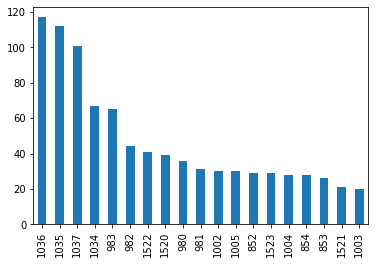

In [ ]:
#Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

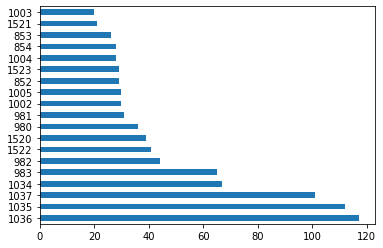

In [ ]:
#Gráfico de barras horizontais
df["LojaID"].value_counts().plot.barh()

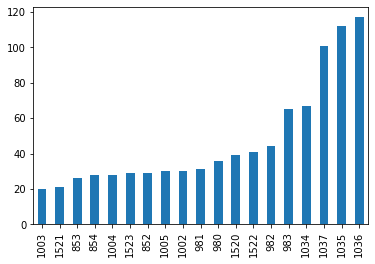

In [ ]:
df["LojaID"].value_counts(ascending=True).plot.bar()

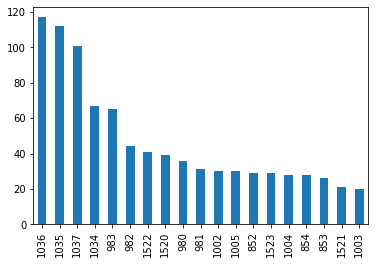

In [ ]:
df["LojaID"].value_counts(ascending=False).plot.bar();

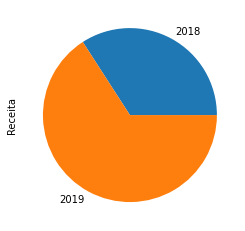

In [68]:
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [ ]:
df["Cidade"].value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

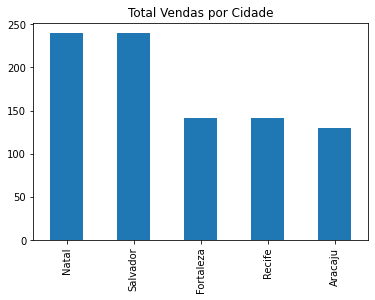

In [33]:
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total Vendas por Cidade")

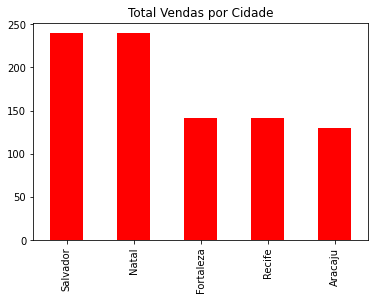

In [ ]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total Vendas por Cidade", color = "red")

In [21]:
#Alterando o estilo
plt.style.use("ggplot")

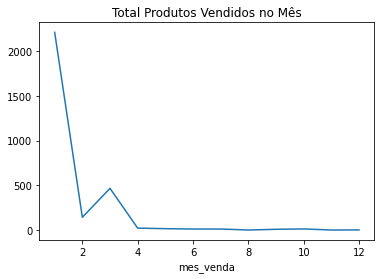

In [11]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title= "Total Produtos Vendidos no Mês")

In [12]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [80]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

In [81]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

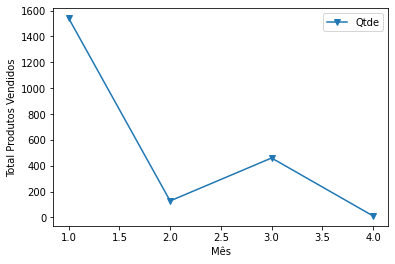

In [82]:
#Total produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")

plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()

m

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

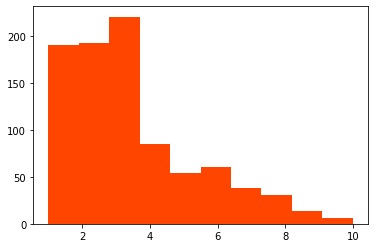

In [83]:
#Histograma
plt.hist(df["Qtde"], color = "orangered")

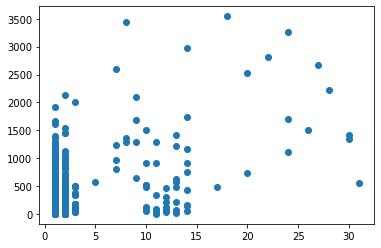

In [84]:
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

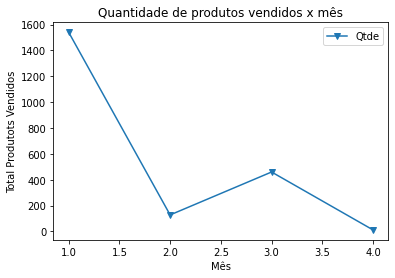

In [87]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtots Vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")